# Flight Fare Prediction 

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')      
sns.set_context('notebook')
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
pd.set_option('display.max_columns',None) #displays max number of cols

## Data Insepction

In [3]:
df=pd.read_excel("Data_Train.xlsx")

In [4]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
df.shape

(10683, 11)

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
df.describe(include = 'object')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


## Data Cleaning

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(220)

In [12]:
df = df.drop_duplicates()

In [13]:
df.dropna(inplace = True)

In [14]:
df['Price'].skew()  ## Right Skew

np.float64(1.8574899082173875)

In [15]:
df.nunique().sort_values(ascending = True)

Source                5
Total_Stops           5
Destination           6
Additional_Info      10
Airline              12
Date_of_Journey      44
Route               128
Dep_Time            222
Duration            368
Arrival_Time       1343
Price              1870
dtype: int64

## Data Preprocessing & EDA

<Axes: xlabel='Price', ylabel='Count'>

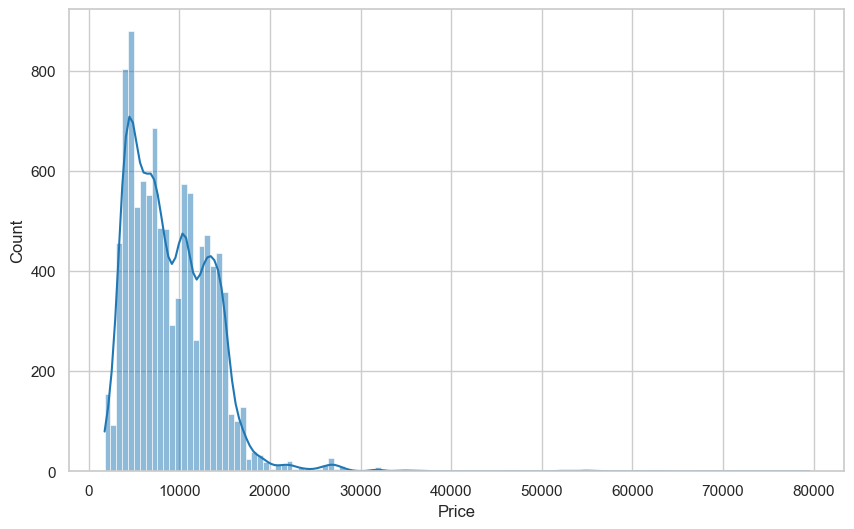

In [16]:
sns.histplot( x ='Price', data = df, kde = True)

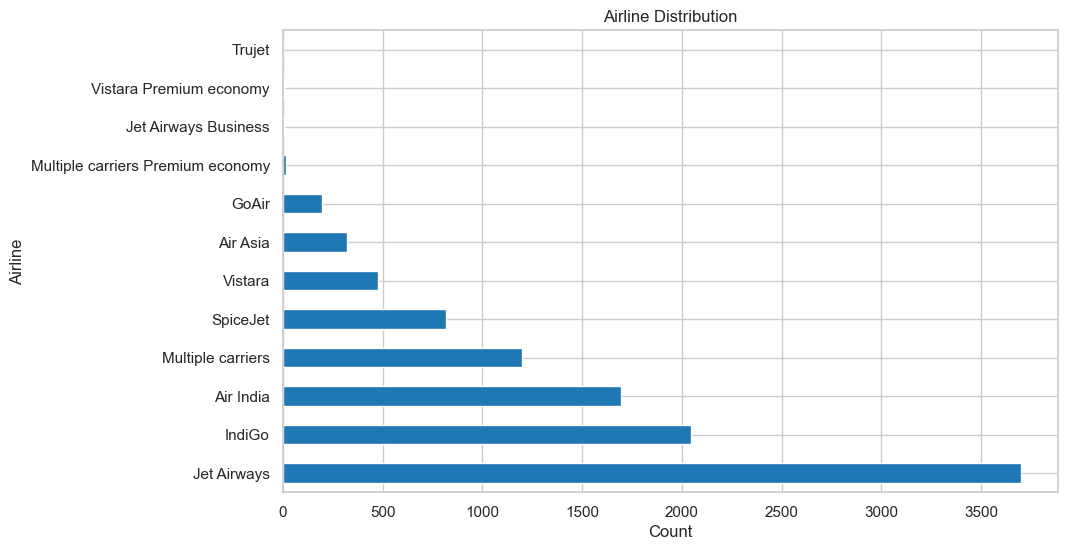

In [17]:
# Calculate counts by Airline
df['Airline'].value_counts().plot(kind='barh')
plt.xlabel("Count")
plt.title("Airline Distribution")
plt.show()

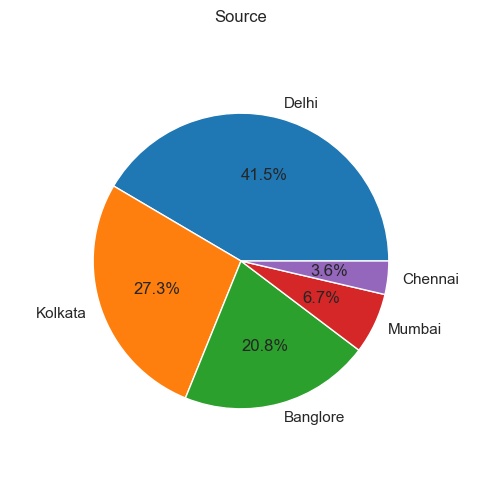

In [18]:
# Calculate counts by Source
Source_var = df['Source'].value_counts()
plt.pie(Source_var, labels=Source_var.index, autopct='%1.1f%%', radius=0.8)
plt.title('Source')
plt.show()

In [19]:
# Since date and time are strings, convert them to datetime using to_datetime()
df["Journey_day"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.month
df["Journey_year"] = pd.to_datetime(df["Date_of_Journey"], format="%d/%m/%Y").dt.year

In [20]:
# Since we have converted Date_of_Journey into features, drop the original column
df.drop(["Date_of_Journey"], axis=1, inplace=True)

In [21]:
# Extract hour and minute from Dep_Time
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Drop the original Dep_Time column
df.drop(["Dep_Time"], axis=1, inplace=True)

In [22]:
# Extract hour and minute from Arrival_Time
df["Arrival_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

# Drop the original Arrival_Time column
df.drop(["Arrival_Time"], axis=1, inplace=True)

In [23]:
df.drop(["Route"], axis=1, inplace=True)

In [24]:
df.drop(['Additional_Info'], axis = 1, inplace=True)

In [25]:
df['Journey_year'].value_counts()

Journey_year
2019    10462
Name: count, dtype: int64

In [26]:
df.drop(["Journey_year"], axis=1, inplace = True)

In [27]:
# Fill missing hours/minutes and split Duration
duration = df["Duration"].str.replace('h', 'h ').str.replace('  ', ' ') 
duration = duration.apply(lambda x: x if 'h' in x else '0h ' + x)
duration = duration.apply(lambda x: x if 'm' in x else x + ' 0m')

df["Duration_hours"] = duration.str.extract(r'(\d+)h').astype(int)
df["Duration_mins"] = duration.str.extract(r'(\d+)m').astype(int)

In [28]:
df.drop(["Duration"], axis=1, inplace=True)

In [29]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True)

In [30]:
df['Airline'].value_counts().sort_values(ascending = True)

Airline
Trujet                                  1
Vistara Premium economy                 3
Jet Airways Business                    6
Multiple carriers Premium economy      13
GoAir                                 194
Air Asia                              319
Vistara                               478
SpiceJet                              815
Multiple carriers                    1196
Air India                            1694
IndiGo                               2043
Jet Airways                          3700
Name: count, dtype: int64

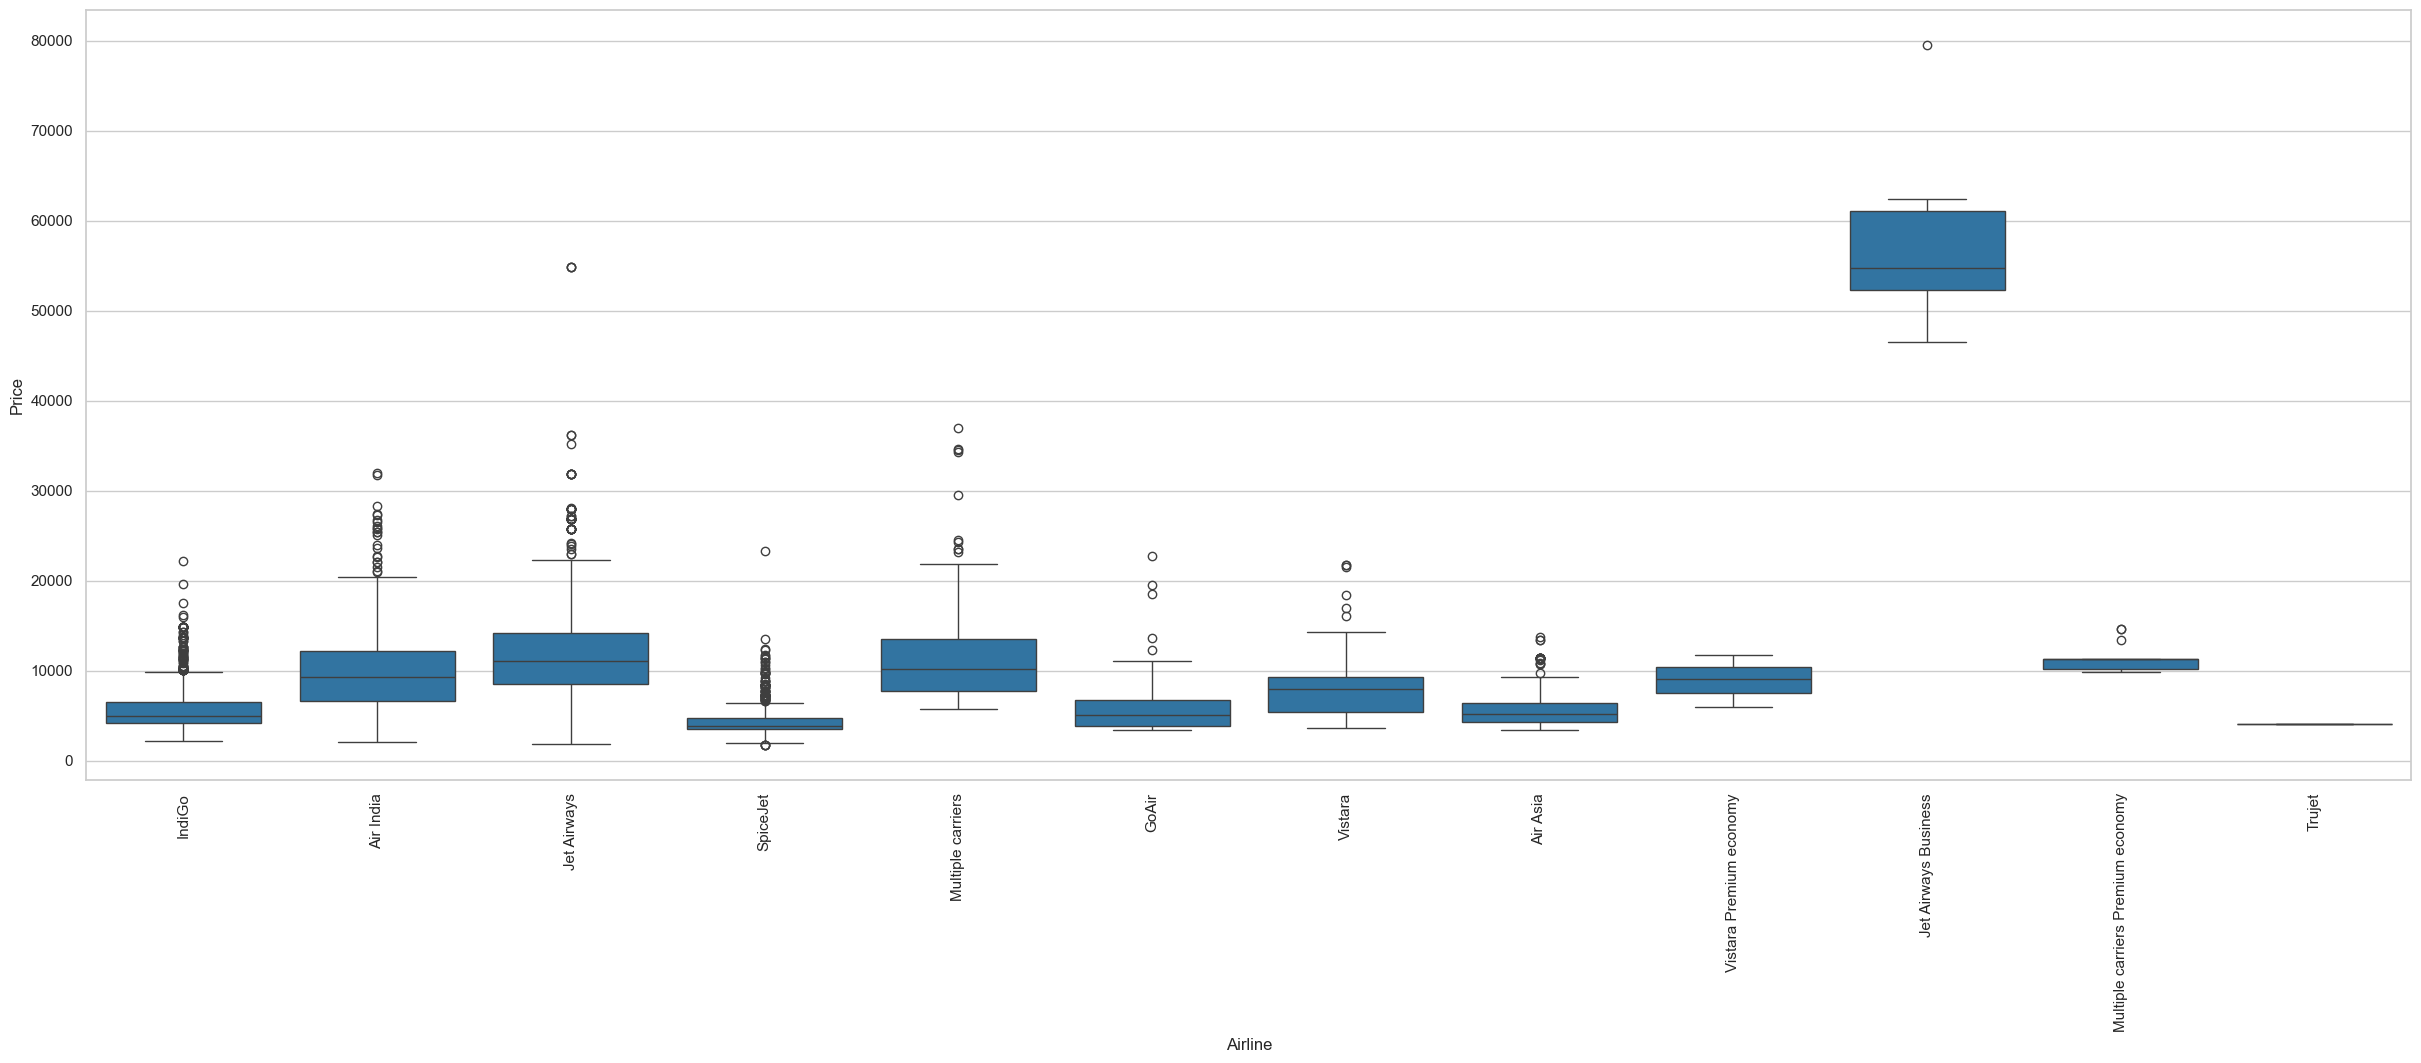

In [31]:
# Price by Airline
plt.figure(figsize = (30,10))
sns.boxplot(x="Airline", y="Price", data=df)
plt.xticks(rotation=90)
plt.show()

In [32]:
df['Source'].value_counts().sort_values(ascending = True)

Source
Chennai      381
Mumbai       697
Banglore    2179
Kolkata     2860
Delhi       4345
Name: count, dtype: int64

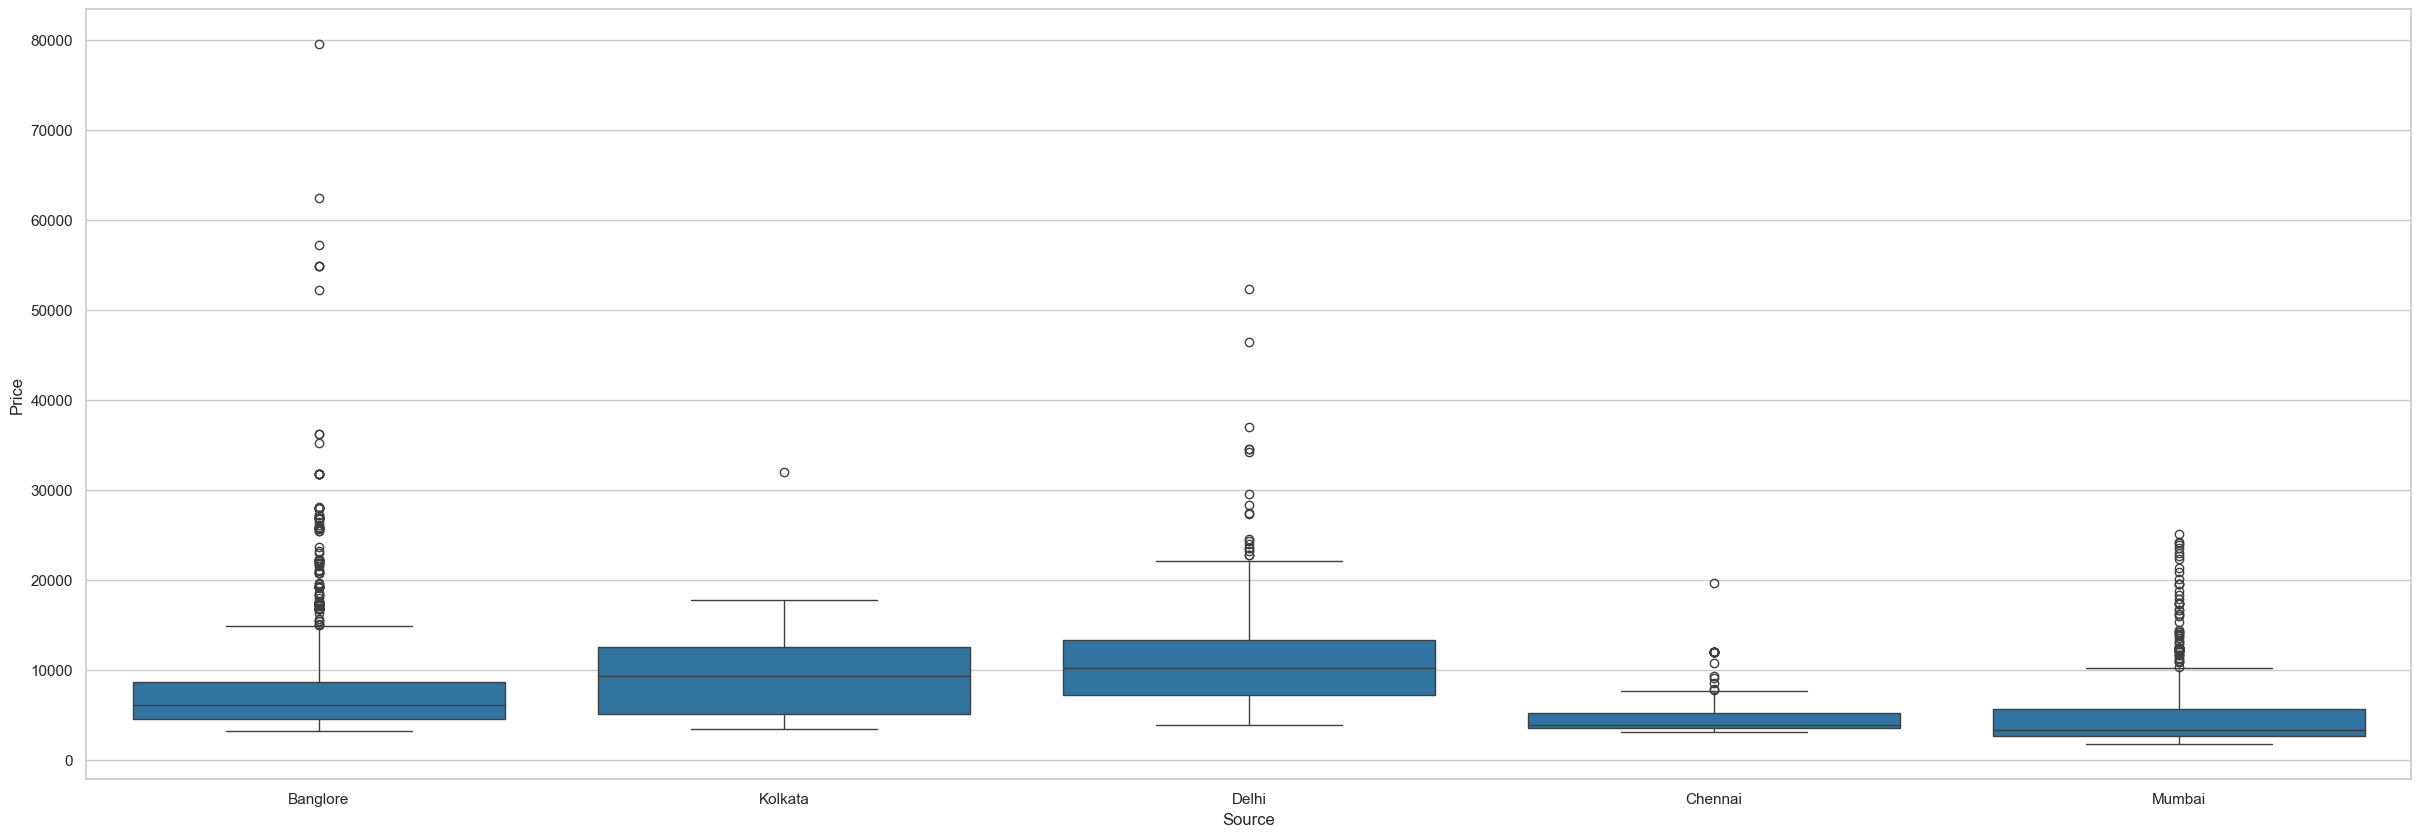

In [33]:
# Source vs Price
plt.figure(figsize=(30,10))
sns.boxplot(y = df["Price"], x = df["Source"])
plt.show()

In [34]:
df['Destination'].value_counts().sort_values(ascending = True)

Destination
Kolkata       381
Hyderabad     697
New Delhi     914
Delhi        1265
Banglore     2860
Cochin       4345
Name: count, dtype: int64

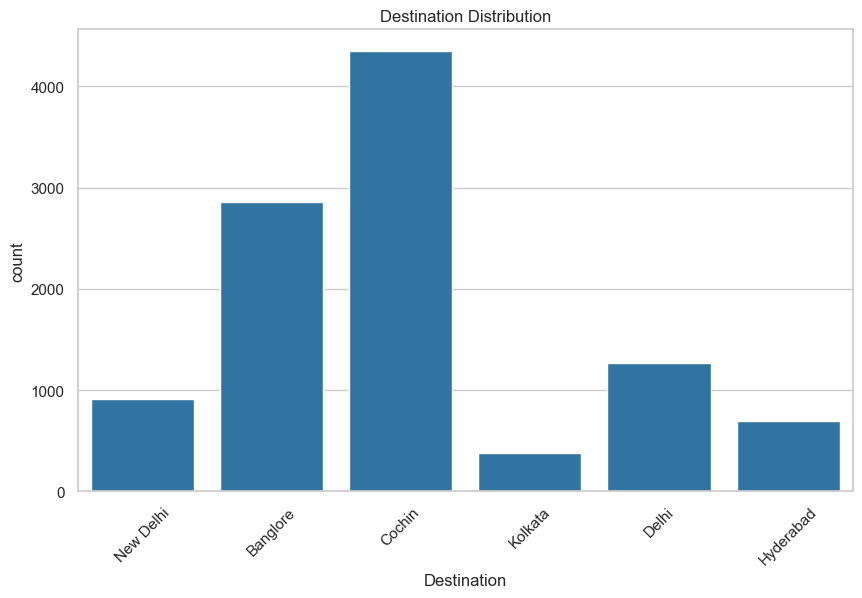

In [35]:
sns.countplot(x="Destination", data=df)
plt.title("Destination Distribution")
plt.xticks(rotation=45)
plt.show()

### Outliers Detection

In [36]:
numeric_cols = df.select_dtypes(include='number').columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df_outliers_removed = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

### Correlation

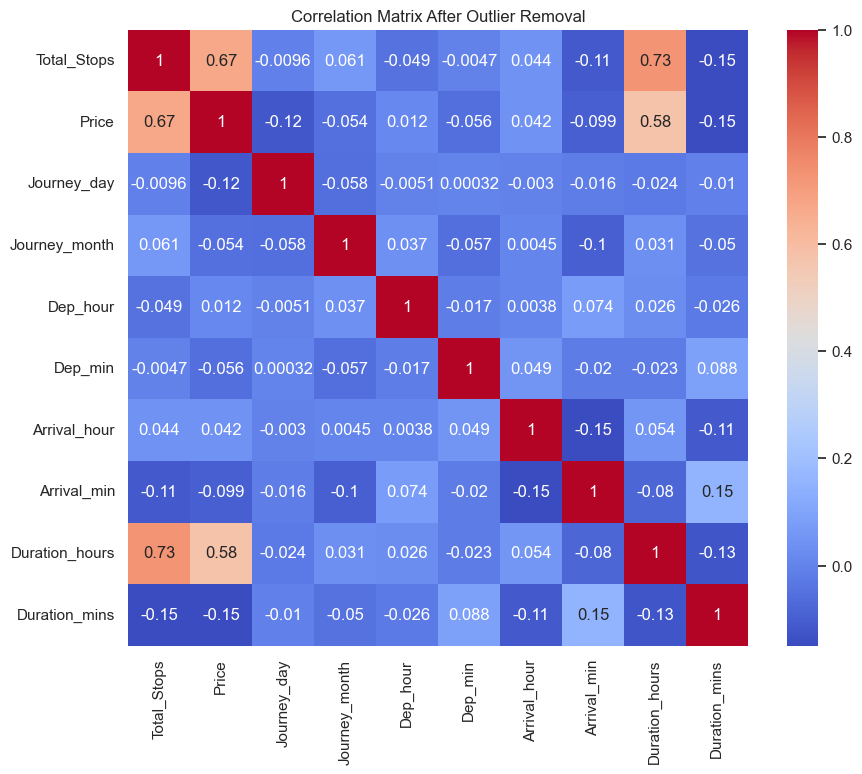

In [37]:
numeric_cols = df_outliers_removed.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix After Outlier Removal')
plt.show()

In [38]:
df = df_outliers_removed
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


### OneHot Encoding

In [39]:
categorical_cols = df.select_dtypes(include='object').columns

# Apply one-hot encoding using get_dummies
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

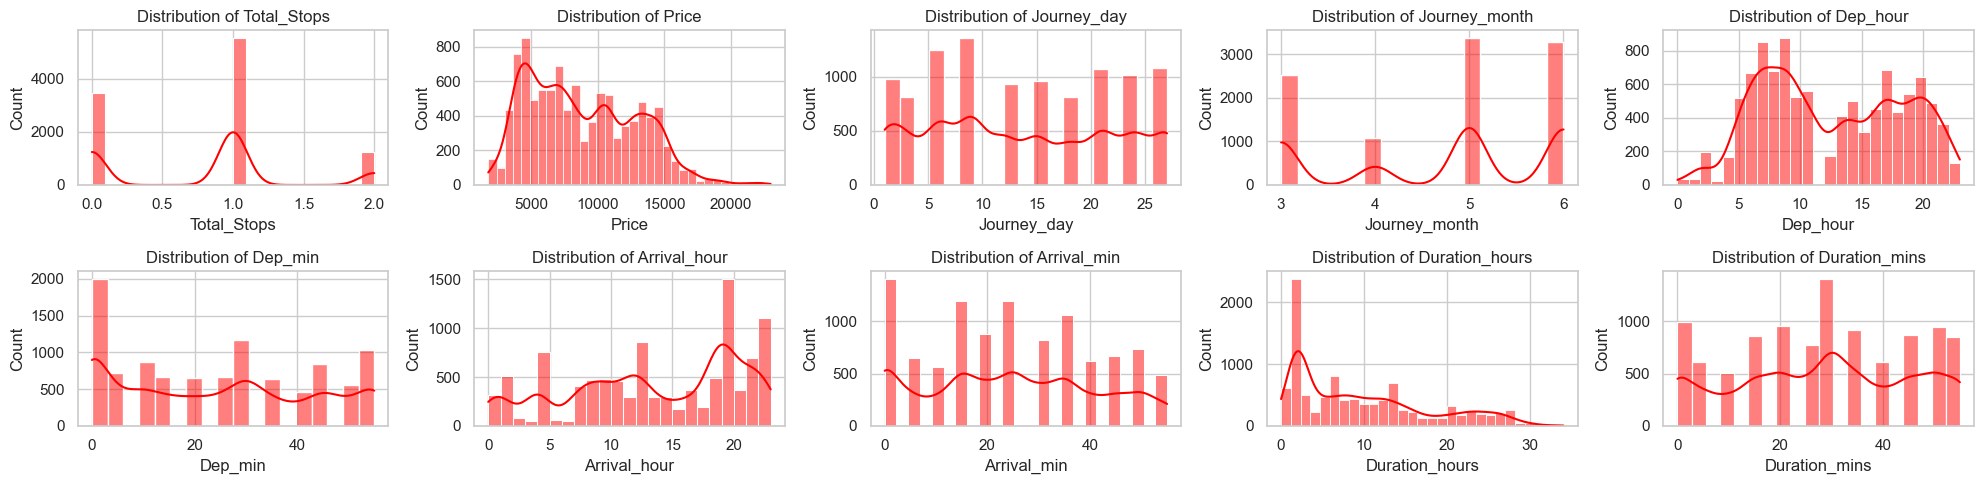

In [40]:
numeric_cols = df.select_dtypes(include='number').columns[:10] 
cols = 5
rows = 2

plt.figure(figsize=(20, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(rows, cols, i+1)
    sns.histplot(df[col], color='red', kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

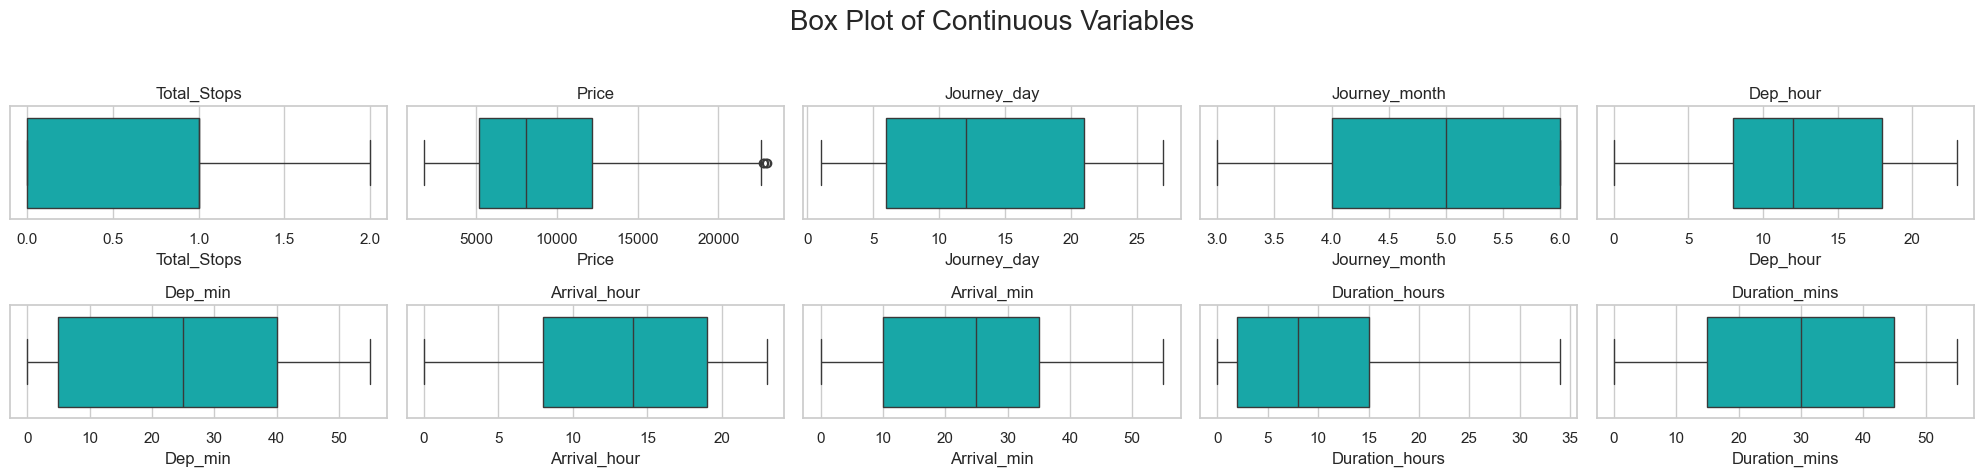

In [41]:
plt.figure(figsize=(20, 5))

numeric_cols = df.select_dtypes(include='number').columns

for i, col in enumerate(numeric_cols[:10]):  
    ax = plt.subplot(2, 5, i + 1)
    sns.boxplot(x=df[col], ax=ax, color='c')
    ax.set_title(col)
plt.suptitle('Box Plot of Continuous Variables', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Power Transformer

In [42]:
from sklearn.preprocessing import PowerTransformer

In [43]:
numeric_cols = df.select_dtypes(include='number').columns

pt = PowerTransformer()
df_transformed = df.copy()
df_transformed[numeric_cols] = pt.fit_transform(df[numeric_cols])

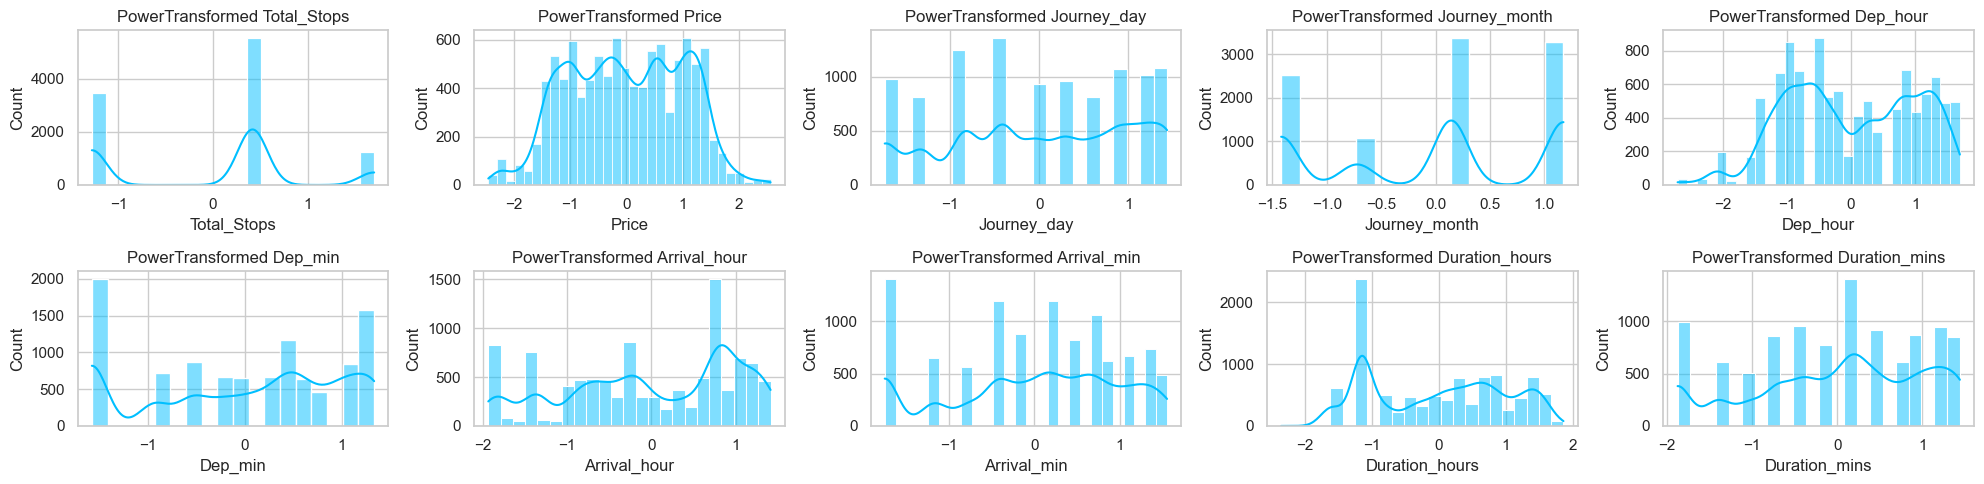

In [44]:
cols = 5
rows = 2
plt.figure(figsize=(20, 5))
for i, col in enumerate(numeric_cols[:cols*rows]):
    plt.subplot(rows, cols, i+1)
    sns.histplot(df_transformed[col], color='deepskyblue', kde=True)
    plt.title(f'PowerTransformed {col}')
plt.tight_layout()
plt.show()

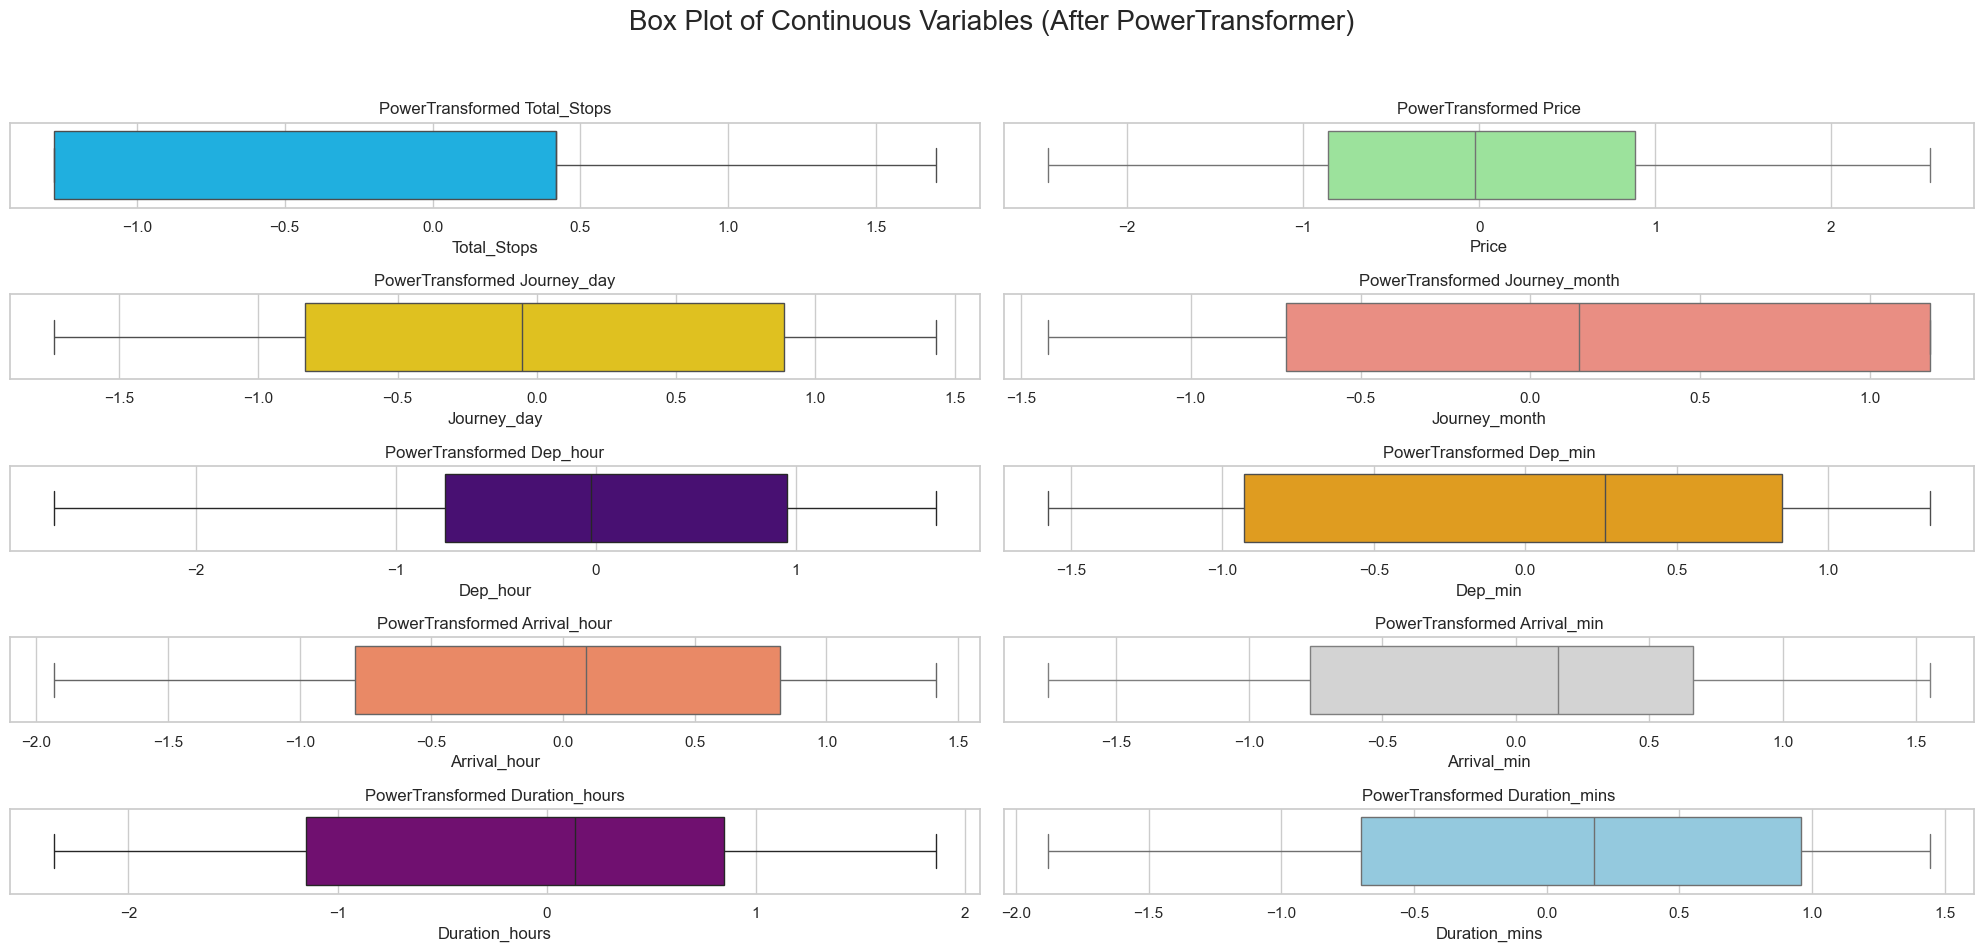

In [45]:
plt.figure(figsize=(20, 10))
colors = ["deepskyblue", "lightgreen", "gold", "salmon", "indigo", "orange", "coral", "lightgrey", "purple", "skyblue"]

for i, col in enumerate(numeric_cols[:10]):  
    ax = plt.subplot(5, 2, i + 1)
    sns.boxplot(x=df_transformed[col], ax=ax, color=colors[i % len(colors)])
    ax.set_title(f'PowerTransformed {col}')
plt.suptitle('Box Plot of Continuous Variables (After PowerTransformer)', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [46]:
df = df_transformed

In [47]:
df.shape

(10272, 29)

In [48]:
df.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [49]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.279796,-1.341609,1.165861,-1.419075,1.553919,0.029354,-1.792980,-0.770154,-1.153004,1.204606,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,1.701334,-0.129416,-1.734038,0.144376,-1.366553,1.181361,-0.058930,-0.428486,-0.006545,-0.098596,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,1.701334,1.197707,-0.421134,1.176325,-0.561804,0.261548,-1.365973,0.157025,1.130917,-1.877946,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,0.417439,-0.534557,-0.054377,0.144376,0.954777,-0.927348,1.414746,0.418743,-0.350235,-0.098596,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,0.417439,1.093037,-1.734038,-1.419075,0.641055,1.181361,1.118798,0.665869,-0.564826,0.959172,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [50]:
X = df.drop("Price", axis=1)

In [51]:
y = df["Price"]

## Feature Selection

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression  # Correlation

In [53]:
rs = SelectKBest(score_func=r_regression, k='all')
rs.fit(X, y)

SelectKBest(k='all', score_func=<function r_regression at 0x000001C408942480>)

In [54]:
feature_scores = pd.Series(rs.scores_, index=X.columns)*100
print(feature_scores.sort_values(ascending=False))

Total_Stops                                  71.638619
Duration_hours                               71.345716
Airline_Jet Airways                          45.419042
Source_Delhi                                 35.365598
Destination_Cochin                           35.365598
Airline_Multiple carriers                    18.576788
Destination_New Delhi                        11.344666
Airline_Air India                             6.782248
Source_Kolkata                                6.302605
Arrival_hour                                  6.054419
Airline_Multiple carriers Premium economy     2.549822
Dep_hour                                      1.288436
Airline_Vistara Premium economy               0.244035
Airline_Trujet                               -1.227814
Journey_month                                -2.999336
Airline_Vistara                              -3.968974
Dep_min                                      -8.728755
Airline_GoAir                               -10.221739
Journey_da

In [55]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [56]:
feature_importances = pd.Series(selection.feature_importances_, index=X.columns)


In [57]:
print(feature_importances.sort_values(ascending=False))

Total_Stops                                  0.321978
Duration_hours                               0.207699
Airline_Jet Airways                          0.117053
Journey_day                                  0.072339
Journey_month                                0.056649
Airline_IndiGo                               0.028906
Arrival_hour                                 0.019820
Dep_hour                                     0.018950
Dep_min                                      0.017983
Airline_Multiple carriers                    0.017511
Arrival_min                                  0.016376
Destination_New Delhi                        0.014258
Duration_mins                                0.013298
Destination_Cochin                           0.012037
Airline_Air India                            0.009931
Source_Delhi                                 0.009874
Source_Mumbai                                0.008007
Airline_SpiceJet                             0.007439
Destination_Hyderabad       

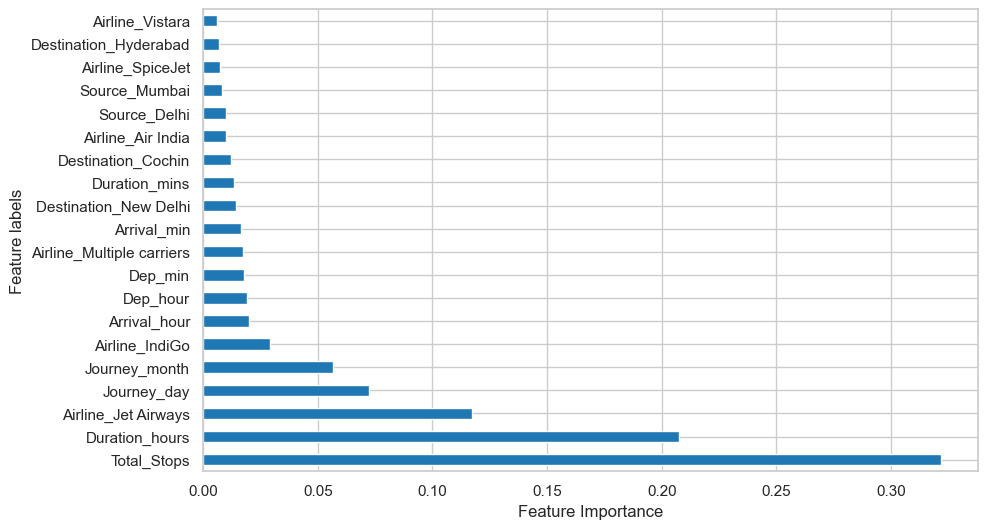

In [58]:
feature_importances.nlargest(20).plot(kind='barh')
plt.ylabel("Feature labels")
plt.xlabel("Feature Importance")
plt.show()

In [59]:
top_features = feature_importances.nlargest(20).index
X1 = X[top_features]

In [60]:
X1.columns

Index(['Total_Stops', 'Duration_hours', 'Airline_Jet Airways', 'Journey_day',
       'Journey_month', 'Airline_IndiGo', 'Arrival_hour', 'Dep_hour',
       'Dep_min', 'Airline_Multiple carriers', 'Arrival_min',
       'Destination_New Delhi', 'Duration_mins', 'Destination_Cochin',
       'Airline_Air India', 'Source_Delhi', 'Source_Mumbai',
       'Airline_SpiceJet', 'Destination_Hyderabad', 'Airline_Vistara'],
      dtype='object')

## Model Building

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state = 42)

In [64]:
model_comparison={}

## Linear Regression

In [65]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred_lr = lr.predict(X_test)

In [67]:
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))

R2 Score: 0.6996677932341544
MSE: 0.2894823923034944
RMSE: 0.5380356793963523
MAE: 0.41351684471712313


In [68]:
model_comparison['LinearRegression'] = {
    'R2': r2_score(y_test, y_pred_lr),
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    'MAE': mean_absolute_error(y_test, y_pred_lr)
}

#### Checking linearity assumption

In [69]:
def calculate_residuals(lr, features, label):
    # Creates predictions on the features with the model and calculates residuals
    predictions = lr.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = df_results['Actual'] - df_results['Predicted']
    return df_results

In [70]:
def linear_assumption(lr, features, label):
    print('Assumption 1: Linear Relationship between the Target and the Feature\n')
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    df_results = calculate_residuals(lr, features, label)
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=7)
    
    line_coords = np.linspace(df_results[['Actual', 'Predicted']].min().min(),
                             df_results[['Actual', 'Predicted']].max().max(), 100)
    plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption 1: Linear Relationship between the Target and the Feature

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


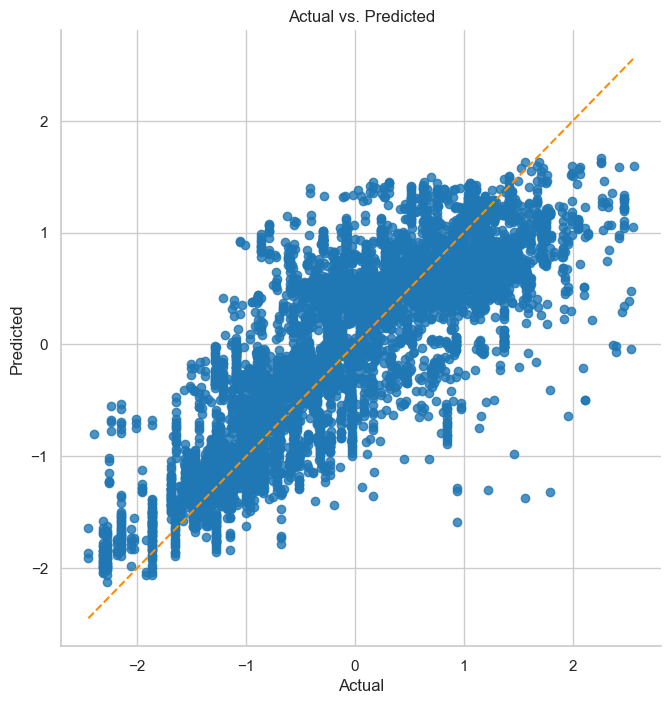

In [71]:
linear_assumption(lr, X_train, y_train)

#### Normality assumption

In [72]:
from statsmodels.stats.diagnostic import normal_ad 

In [73]:
def normal_errors_assumption(lr, X_train, y_train, p_value_thresh=0.05):
    """
    Checks normality of residuals for linear regression using Anderson-Darling test,
    and plots the residual distribution.
    """
    y_pred = lr.predict(X_train)
    residuals = y_train - y_pred

    print('Assumption 2: The error terms are normally distributed\n')
    print('Using the Anderson-Darling test for normal distribution...')

    # Perform Anderson-Darling test
    p_value = normal_ad(residuals)[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    if p_value < p_value_thresh:
        print('Residuals are NOT normally distributed')
        print('Assumption NOT satisfied')
        print('Confidence intervals will likely be affected.')
        print('Try performing nonlinear transformations on variables.')
    else:
        print('Residuals are normally distributed')
        print('Assumption satisfied')

    
    plt.figure(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

Assumption 2: The error terms are normally distributed

Using the Anderson-Darling test for normal distribution...
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are NOT normally distributed
Assumption NOT satisfied
Confidence intervals will likely be affected.
Try performing nonlinear transformations on variables.


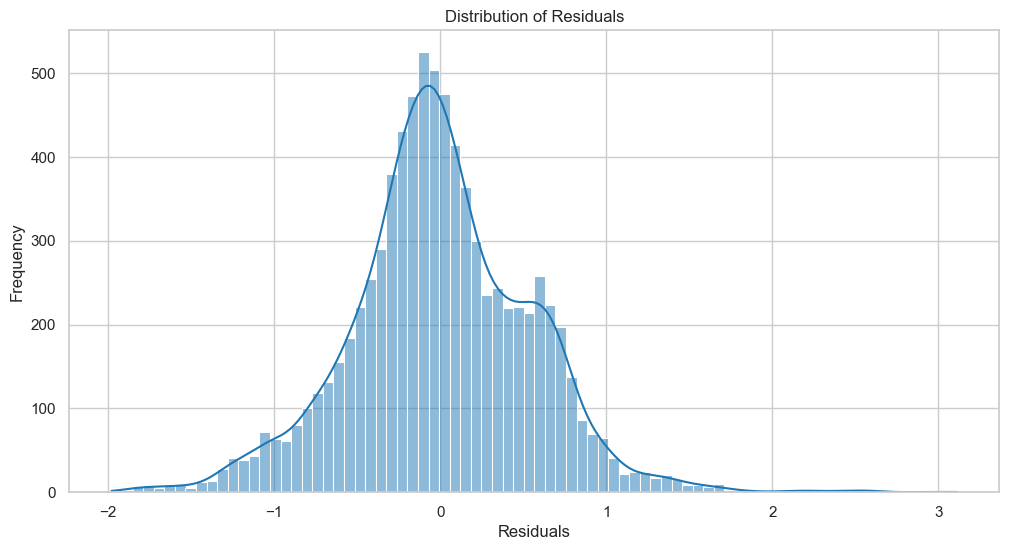

In [74]:
normal_errors_assumption(lr, X_train, y_train)

#### Multicollinearity assumption

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
def calc_vif(X):
    """
    Calculates Variance Inflation Factor (VIF) for each feature column after
    cleaning data of NaN and infinite values.
    """
    # Keep only numeric columns
    X_numeric = X.select_dtypes(include=[np.number])
    # Replace infinite values with NaN, then drop rows with NaN
    X_clean = X_numeric.replace([np.inf, -np.inf], np.nan).dropna()
    
    vif = pd.DataFrame()
    vif["variables"] = X_clean.columns
    vif["VIF"] = [variance_inflation_factor(X_clean.values, i) for i in range(X_clean.shape[1])]
    return vif

In [77]:
vif_result = calc_vif(X_train)  
print(vif_result)

        variables       VIF
0     Total_Stops  3.523610
1  Duration_hours  3.560112
2     Journey_day  1.004596
3   Journey_month  1.023563
4    Arrival_hour  1.048141
5        Dep_hour  1.018130
6         Dep_min  1.020159
7     Arrival_min  1.088331
8   Duration_mins  1.080899


#### Autocorrelation assumption

In [78]:
 from statsmodels.stats.stattools import durbin_watson

In [79]:
def autocorrelation_assumption(lr, X_train, y_train):
    """
    Checks autocorrelation of residuals using Durbin-Watson test.
    Assumes the residuals should not be correlated for classical linear regression.
    """
    y_pred = lr.predict(X_train)
    residuals = y_train - y_pred

    print('Assumption 4: No Autocorrelation\n')
    print('Performing Durbin-Watson Test')
    print('Values between 1.5 and 2.5 generally show no autocorrelation')
    print('0 - 1.5: positive autocorrelation')
    print('2.5 - 4: negative autocorrelation')
    print('-------------------------------------')

    dw_value = durbin_watson(residuals)
    print('Durbin-Watson:', dw_value)
    if dw_value < 1.5:
        print('Signs of positive autocorrelation\nAssumption not satisfied')
    elif dw_value > 2.5:
        print('Signs of negative autocorrelation\nAssumption not satisfied')
    else:
        print('Little to no autocorrelation\nAssumption satisfied')

In [80]:
autocorrelation_assumption(lr, X_train, y_train)

Assumption 4: No Autocorrelation

Performing Durbin-Watson Test
Values between 1.5 and 2.5 generally show no autocorrelation
0 - 1.5: positive autocorrelation
2.5 - 4: negative autocorrelation
-------------------------------------
Durbin-Watson: 2.0240255305437818
Little to no autocorrelation
Assumption satisfied


#### Homoscedasticity assumption

In [81]:
def homoscedasticity_assumption(lr, X_train, y_train):
    """
    Checks for constant variance in residuals (homoscedasticity) for linear regression.
    """
    y_pred = lr.predict(X_train)
    residuals = y_train - y_pred

    print('Assumption 5: Homoscedasticity of Error Terms\n')
    print('Residuals should show constant variance.')

    plt.figure(figsize=(12, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0, color='darkorange', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Values')
    plt.show()

Assumption 5: Homoscedasticity of Error Terms

Residuals should show constant variance.


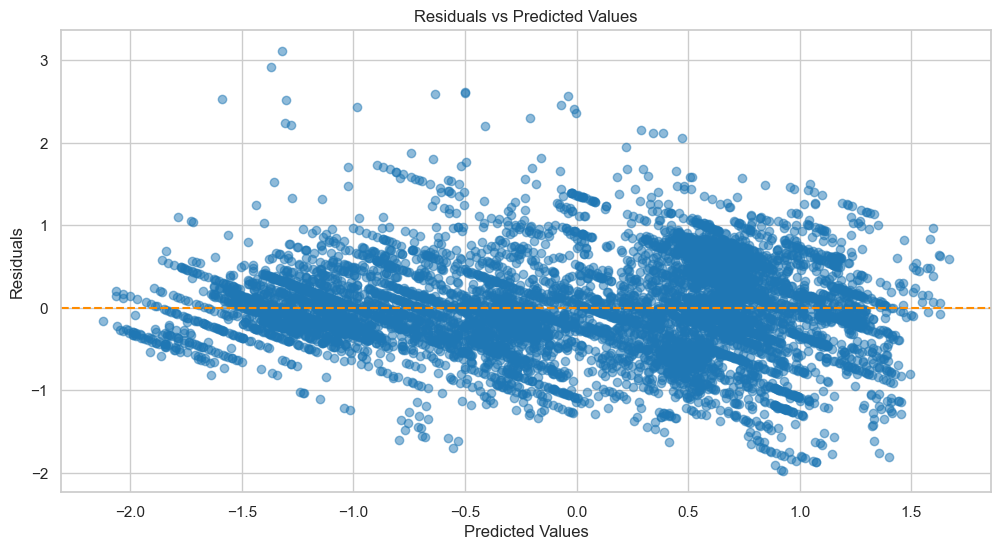

In [82]:
homoscedasticity_assumption(lr, X_train, y_train)

## DecisionTree 

In [83]:
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [84]:
y_pred_dt = dt.predict(X_test)

In [85]:
print("R2 Score:", r2_score(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))

R2 Score: 0.7294295241083384
MSE: 0.26079583502304704
RMSE: 0.5106817355487143
MAE: 0.32367563608328814


In [86]:
model_comparison['DecisionTree'] = {
    'R2': r2_score(y_test, y_pred_dt),
    'MSE': mean_squared_error(y_test, y_pred_dt),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dt)),
    'MAE': mean_absolute_error(y_test, y_pred_dt)
}

## Random Forest

**linearity assumption is violated so random forest(non-linear data) is used**

In [87]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [88]:
y_pred_rf = rf.predict(X_test)

In [89]:
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))

R2 Score: 0.8285372103248156
MSE: 0.1652685174217815
RMSE: 0.406532307967991
MAE: 0.274294791564093


In [90]:
model_comparison['Random Forest'] = {
    'R2': r2_score(y_test, y_pred_rf),
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'MAE': mean_absolute_error(y_test, y_pred_rf)
}

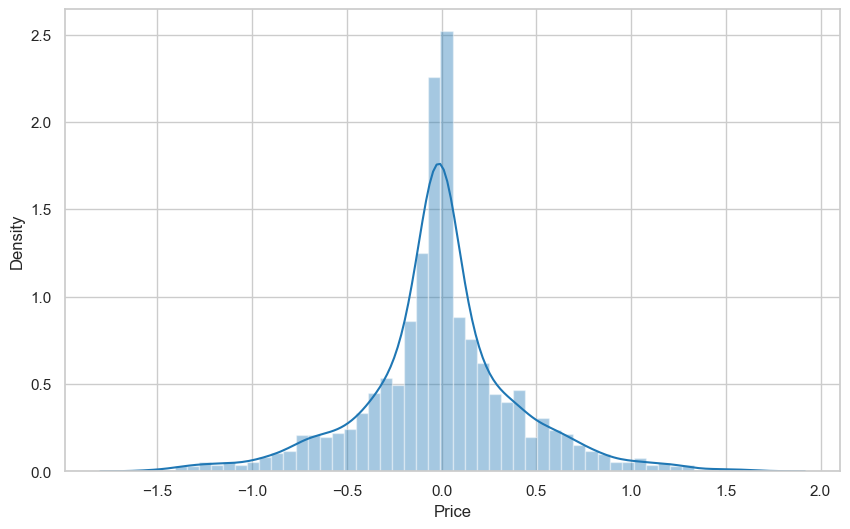

In [91]:
sns.distplot(y_test-y_pred_rf)
plt.show()

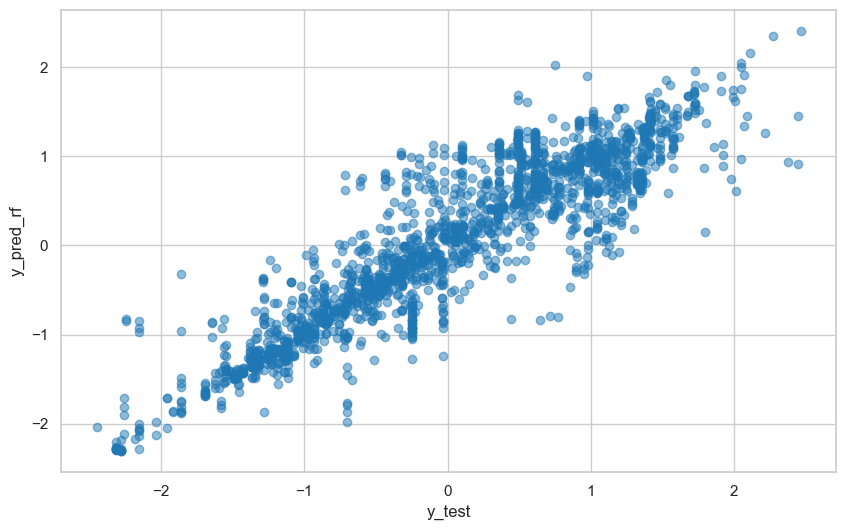

In [92]:
plt.scatter(y_test, y_pred_rf, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_rf")
plt.show()

## Hyperparameter Tuning

In [93]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

max_features = ['sqrt', 'log2']  

max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
max_depth.append(None)  
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [94]:
rf_random = RandomizedSearchCV(
    estimator= rf,
    param_distributions=random_grid,
    n_iter=100,             
    scoring='neg_mean_squared_error',  
    cv=5,                   
    verbose=2,
    random_state=0,         
    n_jobs=-1               
)

In [95]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30,
                                                      None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [96]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [97]:
prediction = rf_random.predict(X_test)

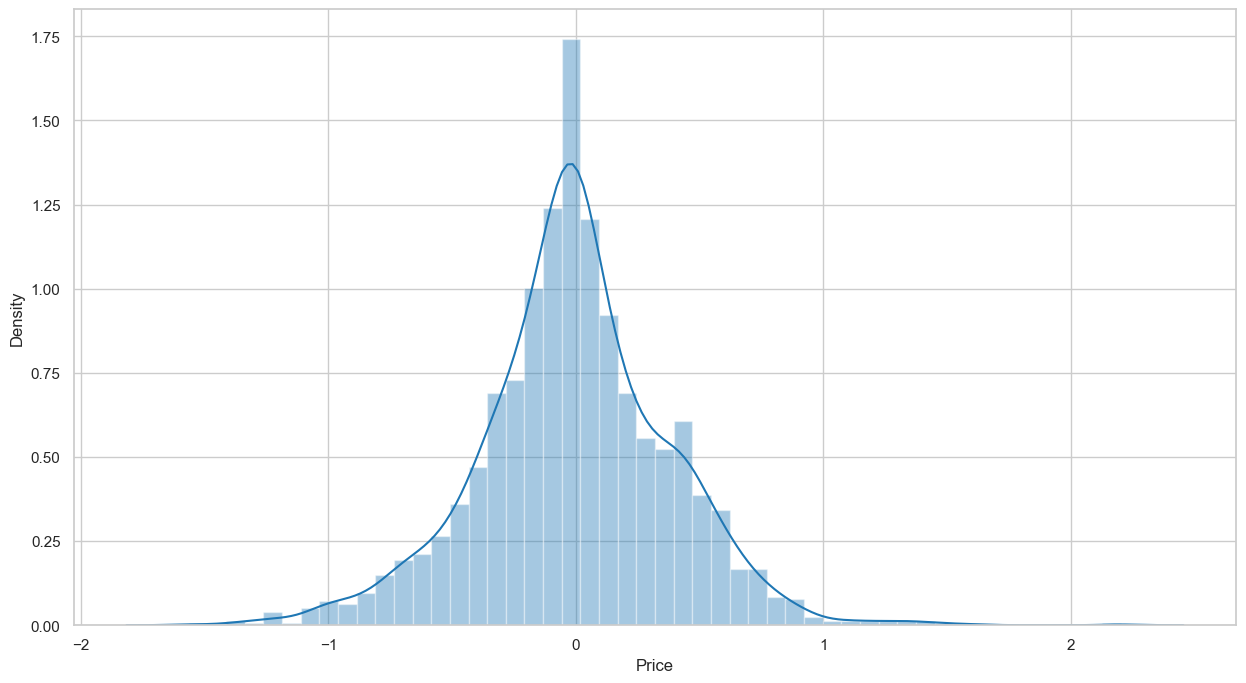

In [98]:
plt.figure(figsize = (15,8))
sns.distplot(y_test-prediction)
plt.show()

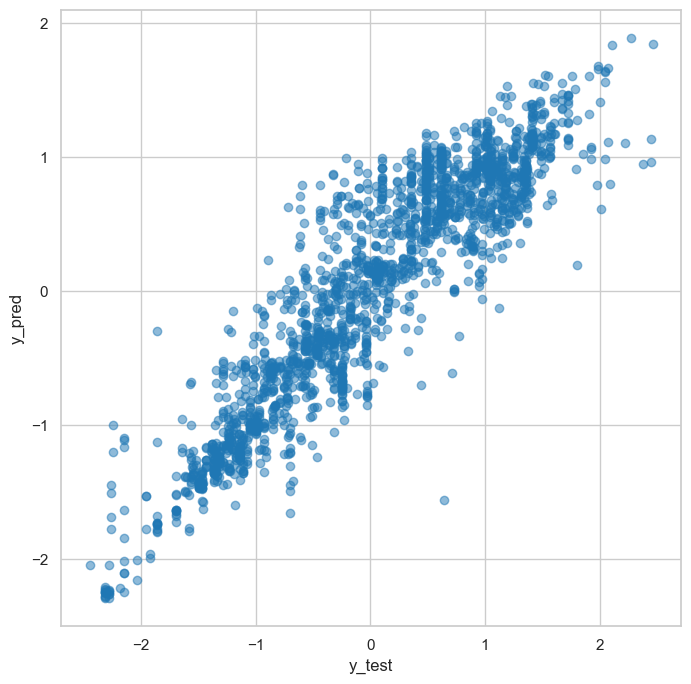

In [99]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [100]:
print("R2 Score:", r2_score(y_test, prediction))
print("MSE:", mean_squared_error(y_test, prediction))
print("RMSE:", np.sqrt(mean_squared_error(y_test, prediction)))
print("MAE:", mean_absolute_error(y_test, prediction))

R2 Score: 0.8450821434477532
MSE: 0.14932128727785154
RMSE: 0.38642112685236496
MAE: 0.2864533781987897


In [101]:
model_comparison['R F After Tunning'] = {
    'R2': r2_score(y_test, prediction),
    'MSE': mean_squared_error(y_test, prediction),
    'RMSE': np.sqrt(mean_squared_error(y_test, prediction)),
    'MAE': mean_absolute_error(y_test, prediction)
}

## Gradient Boosting

In [103]:
from sklearn.ensemble import GradientBoostingRegressor

In [104]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [105]:
gb_pred = gb.predict(X_test)

In [106]:
print("R2 Score:", r2_score(y_test, gb_pred))
print("MSE:", mean_squared_error(y_test, gb_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, gb_pred)))
print("MAE:", mean_absolute_error(y_test, gb_pred))

R2 Score: 0.804530790509146
MSE: 0.1884076802632153
RMSE: 0.434059535390268
MAE: 0.3399156002433246


In [107]:
model_comparison['Gradient Boosting'] = {
    'R2': r2_score(y_test, gb_pred),
    'MSE': mean_squared_error(y_test, gb_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, gb_pred)),
    'MAE': mean_absolute_error(y_test, gb_pred)
}

## XGboost

In [108]:
import xgboost as xgb

In [110]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [111]:
xgb_pred = xgbr.predict(X_test)

In [112]:
print("R2 Score:", r2_score(y_test, xgb_pred))
print("MSE:", mean_squared_error(y_test, xgb_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, xgb_pred)))
print("MAE:", mean_absolute_error(y_test, xgb_pred))

R2 Score: 0.8598120469312733
MSE: 0.13512351693304991
RMSE: 0.3675915082439336
MAE: 0.2618111561175429


In [113]:
model_comparison['XGBoost'] = {
    'R2': r2_score(y_test, xgb_pred),
    'MSE': mean_squared_error(y_test, xgb_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, xgb_pred)),
    'MAE': mean_absolute_error(y_test, xgb_pred)
}

In [114]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

In [115]:
grid_search = GridSearchCV(estimator=xgbr,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [120]:
print("Best parameters:", grid_search.best_params_)
best_xgbr = grid_search.best_estimator_

xgb_tuned_pred = best_xgbr.predict(X_test)

print("R2 Score:", r2_score(y_test, xgb_tuned_pred))
print("MSE:", mean_squared_error(y_test, xgb_tuned_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, xgb_tuned_pred)))
print("MAE:", mean_absolute_error(y_test, xgb_tuned_pred))

Best parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
R2 Score: 0.8682099711306163
MSE: 0.1270289765113342
RMSE: 0.3564112463311648
MAE: 0.2655487590505811


In [122]:
model_comparison['XgBoost After Tunning'] = {
    'R2': r2_score(y_test, xgb_tuned_pred),
    'MSE': mean_squared_error(y_test, xgb_tuned_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, xgb_tuned_pred)),
    'MAE': mean_absolute_error(y_test, xgb_tuned_pred)
}

## Model Comparision

In [123]:
df_model_comparison = pd.DataFrame(model_comparison).T  
df_model_comparison

,R2,MSE,RMSE,MAE
LinearRegression,0.699668,0.289482,0.538036,0.413517
DecisionTree,0.729430,0.260796,0.510682,0.323676
Random Forest,0.828537,0.165269,0.406532,0.274295
R F After Tunning,0.845082,0.149321,0.386421,0.286453
Gradient Boosting,0.804531,0.188408,0.434060,0.339916
XGBoost,0.859812,0.135124,0.367592,0.261811
XgBoost After Tunning,0.868210,0.127029,0.356411,0.265549
